:::{.column-body-outset}
<h1 style="color: #00205b; font-family: 'Georgia';">How Predictive Models Help British Airways Acquire Customers</h1>
<author style="color: #00205b; font-family: 'Georgia';">By: <a href="https://www./">Simon Tagbor</a></author>
<date style="color: #00205b; font-family: 'Georgia';">2024-01-21</date>
:::


><p>The Goal of the project is to help British Airways understand their customer's booking behaviour for the holidays by looking at 5000 records of fligt booking data. 
><p>It was part of a job simulation as a Junior Data Scientist at British Airways where I built a predictive model on Random Forest Algoritmn to Help British Airways Answer two business questions:</p><ol style="font-size:18px"><li><em>What are the most important varables contribute to customers booking holidays with British Airways?</em></li><li><em>Is it Viable to Use the gievn data to Predict Customers booking holidays with British Airways?</em></li>
></ol></p>
>
><p>In this Interactive Notebook  I will demonstrate my data science process for building a predictive model based of customer flight booking data.
><p>Follow along and be free to reach out with comments and feedback on my process.</p>
></p>
>
> You can find the source code for this project at my <a href="https://github.com/Simontagbor/BritishAirways-predictive-ML">github page.</a> 
>You can also find the  Jupyter notebook and the dataset on my <a href="https://www.kaggle.com/simontagbor/british-airways-predictive-ml">kaggle page</a>.


<details>
<summary>Click to Read Executive Summary on Research Findings</summary>
<div style="
    font-size: 1.5vw; 
    color: #333; 
    padding: 1.5vw; 
    margin: 1.5vw 0; 
    border-left: 0.25vw solid #7792f9; 
    line-height: 1.6; 
    position: relative; 
    background: #e9f5ff;">
<h2>Executive Summary</h2>
<p>After building and testing the predictive model with 83.5% Accuracy on the given data, we discorvered Answers to the business questions:</p>
<ul>
<li>The Top Ten(10) Most Important Variables That Contribute to Customers Booking Holidays with British Airways are:</li>
</ul>
<div style="display: grid; grid-template-columns: auto auto; padding: 10px; background-color: white; width:70%; margin-left: 9%;">
  <div style="font-size: 12px; text-align: left;">1. Booking Origins From Malaysia</div>
  <div style="font-size: 12px; text-align: left;">2. Flight Duration</div>
  <div style="font-size: 12px; text-align: left;">3. Purchase lead</div>
  <div style="font-size: 12px; text-align: left;">4. Length of stay</div>
  <div style="font-size: 12px; text-align: left;">5. Flight hour</div>
  <div style="font-size: 12px; text-align: left;">6. Flight day</div>
  <div style="font-size: 12px; text-align: left;">7. Flights from Australia</div>
  <div style="font-size: 12px; text-align: left;">8. Flights from Indonesia</div>
  <div style="font-size: 12px; text-align: left;">9. Number of passengers per booking</div>
  <div style="font-size: 12px; text-align: left;">10. Bookings from China</div>
</div>
<ul>
<li>It Is Viable To Use the Given Data to Predict Customers Booking Holidays With British Airways with 83.7% Accuracy</li>
<p>However, The model has room for improvement. More data can be collected, particularly data on the customers who completed the booking. This will help improve the model's performance significantly. Other techniques include the ensemble approach to learning, which involves combining multiple models to improve the model's performance.

overall the model is fairly viable for use in making predictions.</p>
</ul>
<h3>Potential Application of Insights</h3>
<p>With insights from the predictive model, British Airways sales and marketing function can deploy their strategy to `flight origins` like Malaysia, Australia, Indonesia and China to increase their sales and revenue. They can also experiment with promotional incentives around `flight duration`, `purchase lead` and `length of stay`.</p>
<p>Logistics and Supply Chain function can use the predictive model to forecast the demand for flights during holiday seasons based on historical booking patterns. This can enable the team to Adjust inventory levels and allocate resources more efficiently in response to predicted demand.</p>
</div>
</details>


<h2>Project Outline</h2>

<em>For this project I completed the following tasks:</em>

- [x] Performed Exploratory Data Analysis.
- [x] Cleaned and Prepared the data for modeling.
- [x] Performed Feature Engineering.
- [x] Built and Evaluated models.
- [x] Test the model on unseen data.
- [x] Interpret the model results and answer the business questions.


<h2>Project  Dependencies</h2>

In [1]:
#| code-fold: true
#| code-summary: "Show the code"

# import project libraries
import pandas as pd
import numpy as np # for linear algebra
import math # for math operations 

import seaborn as sns # for plotting

# handling files
import os 
import sys 

# data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Model Building and Fitting
from sklearn.ensemble import RandomForestClassifier


# Model Evaluation and Tuning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import precision_recall_curve, auc

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt # for plotting
import squarify # for tree maps

<h1> Exploratory Data Analysis</h1>
<p>The working <a href="https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1667814300249/customer_booking.csv">dataset</a> contains 5000 entries of customer booking data from British Airways. The data contains 13 features and 1 target variable; the booking completion status of the customer.</p>

<p>To understand the data, I performed exploratory data analysis. I used the following techniques to understand the data:</p>

- [x] Visual inspection of data.
- [x] Exploratory Data Visualizations.(Univariate, Bivariate and Multivariate analysis)


<h2>Visual Inspection of Data</h2>

In [28]:
df = pd.read_csv("predictive_model_data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [29]:
# retrieve a summarised info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

<p>The summary on the columns indicates that there are:</p>
<ul>
<li><strong>14 unique columns</strong></li>
<li><strong>5000 rows</strong></li>
<li><strong>Zero null values (which is good!)</strong></li>
<li><strong>Three unique data types (int64, float64 and object)</strong></li>
</ul>

<p>You can dive into the details about the description of the dataset:</p>
<details>
<summary>Click to expand!</summary>
<ul>
  <li><code>num_passengers</code> = the number of passengers associated with a particular flight booking.</li>
  <li><code>sales_channel</code> = indicates the channel through which the flight booking was made.</li>
  <li><code>trip_type</code> = indicates the trip Type (Round Trip, One Way, Circle Trip)</li>
  <li><code>purchase_lead</code> = the number of days between travel date and booking date</li>
  <li><code>length_of_stay</code> = the number of days spent at destination</li>
  <li><code>flight_hour</code> = represents the scheduled departure or arrival time of the flight</li>
  <li><code>flight_day</code> = day of week of flight departure</li>
  <li><code>route</code> = origin -> represents the destination flight route</li>
  <li><code>booking_origin</code> = shows the country from where booking was made</li>
  <li><code>wants_extra_baggage</code> = indicates if the customer wanted extra baggage in the booking</li>
  <li><code>wants_preferred_seat</code> = indicates if the customer wanted a preferred seat in the booking</li>
  <li><code>wants_in_flight_meals</code> = if the customer wanted in-flight meals in the booking</li>
  <li><code>flight_duration</code> = shows the total duration of flight (in hours)</li>
  <li><code>booking_complete</code> = indicates if the customer completed the booking</li>
</ul>
</details>

<p>For the purposes of priliminary analysis, I will encode the categorical  `flight_day` column to represent the days of the week as hierachical integers.</p>


In [30]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

 
<p>As can be seen the current days of the week have no order or hierarchy.</p>
<p>To encode this variable I will map the days of the week to the following numerical representations:</p> 

In [31]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

# set the new values
df["flight_day"] = df["flight_day"].map(mapping)

In [32]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

<p>As can be seen the `fligt_days` column has been successfully encoded.</p>
<p>Now Let's begin by performing some summary statistics on the data. doing so will help us have a sense of the spread of the data and do an initial spot check for outliers.</p>

<h3>Summary Statistics</h3>

In [33]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


<h4>Some Highlights from The summary statistics</h4>

1. The majority of bookings involve a small ` number of passengers `, with 75% of the bookings having either 1 or 2 passengers. However, there are cases with up to 9 passengers.

2. The average ` purchase lead ` time is approximately 85 days, indicating that customers typically book flights well in advance of their travel dates. Inferring from the significant difference between the mean and the median(50th percentile) the distribution is positively-skewed. The predictive model will be trained with ` Random Forest ` Algorithm so it is important to note that this algorithm is not sensitive to outliers.

3. It's also interesting to point out that the average ` length of stay ` is approximately 23 days, indicating that customers typically stay at their destination for a short period of time. However, the maximum length of stay is 778 days, suggesting some outliers or potentially long-term bookings.

<p>Further inspection of the data will help us understand the data better.</p>

<h4>Checking for Missing Values</h4>

In [34]:
### Check for Nmissing values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

There currently  no null values in the dataset. This is good news!

<p>In the next step I will use visualisations to bring to life patterns in the data. These patterns will inform decisions around feature engineering and model selection.</p>

<h2>Exploratory Data Visualizations </h2>
<p>To highlight the distributions of the individual vaiables as well as the relationsip between the variables and the target variables,  I used the following techniques:</p>

- [x] Univariate Analysis
- [x] Bivariate Analysis


<h3> Univariate analysis</h3>
My goal for this initial step was to understand the overall distribution of each variable in the dataset. I used the following techniques to achieve this:

- [x] distribution plots
- [x] tree maps
- [x] bar plots

Hopefully, patterns and outliers would emerge from this analysis.

- `booking_complete`
- `num_passengers`
- `purchase_lead`
- `flight_day`
- `Sales_channel`
- `trip_type`
- `booking_origin`
- `flight_duration`
- `route`

I examined these variables in the dataset using distribution plots. The plots below show the distribution of the following variables:

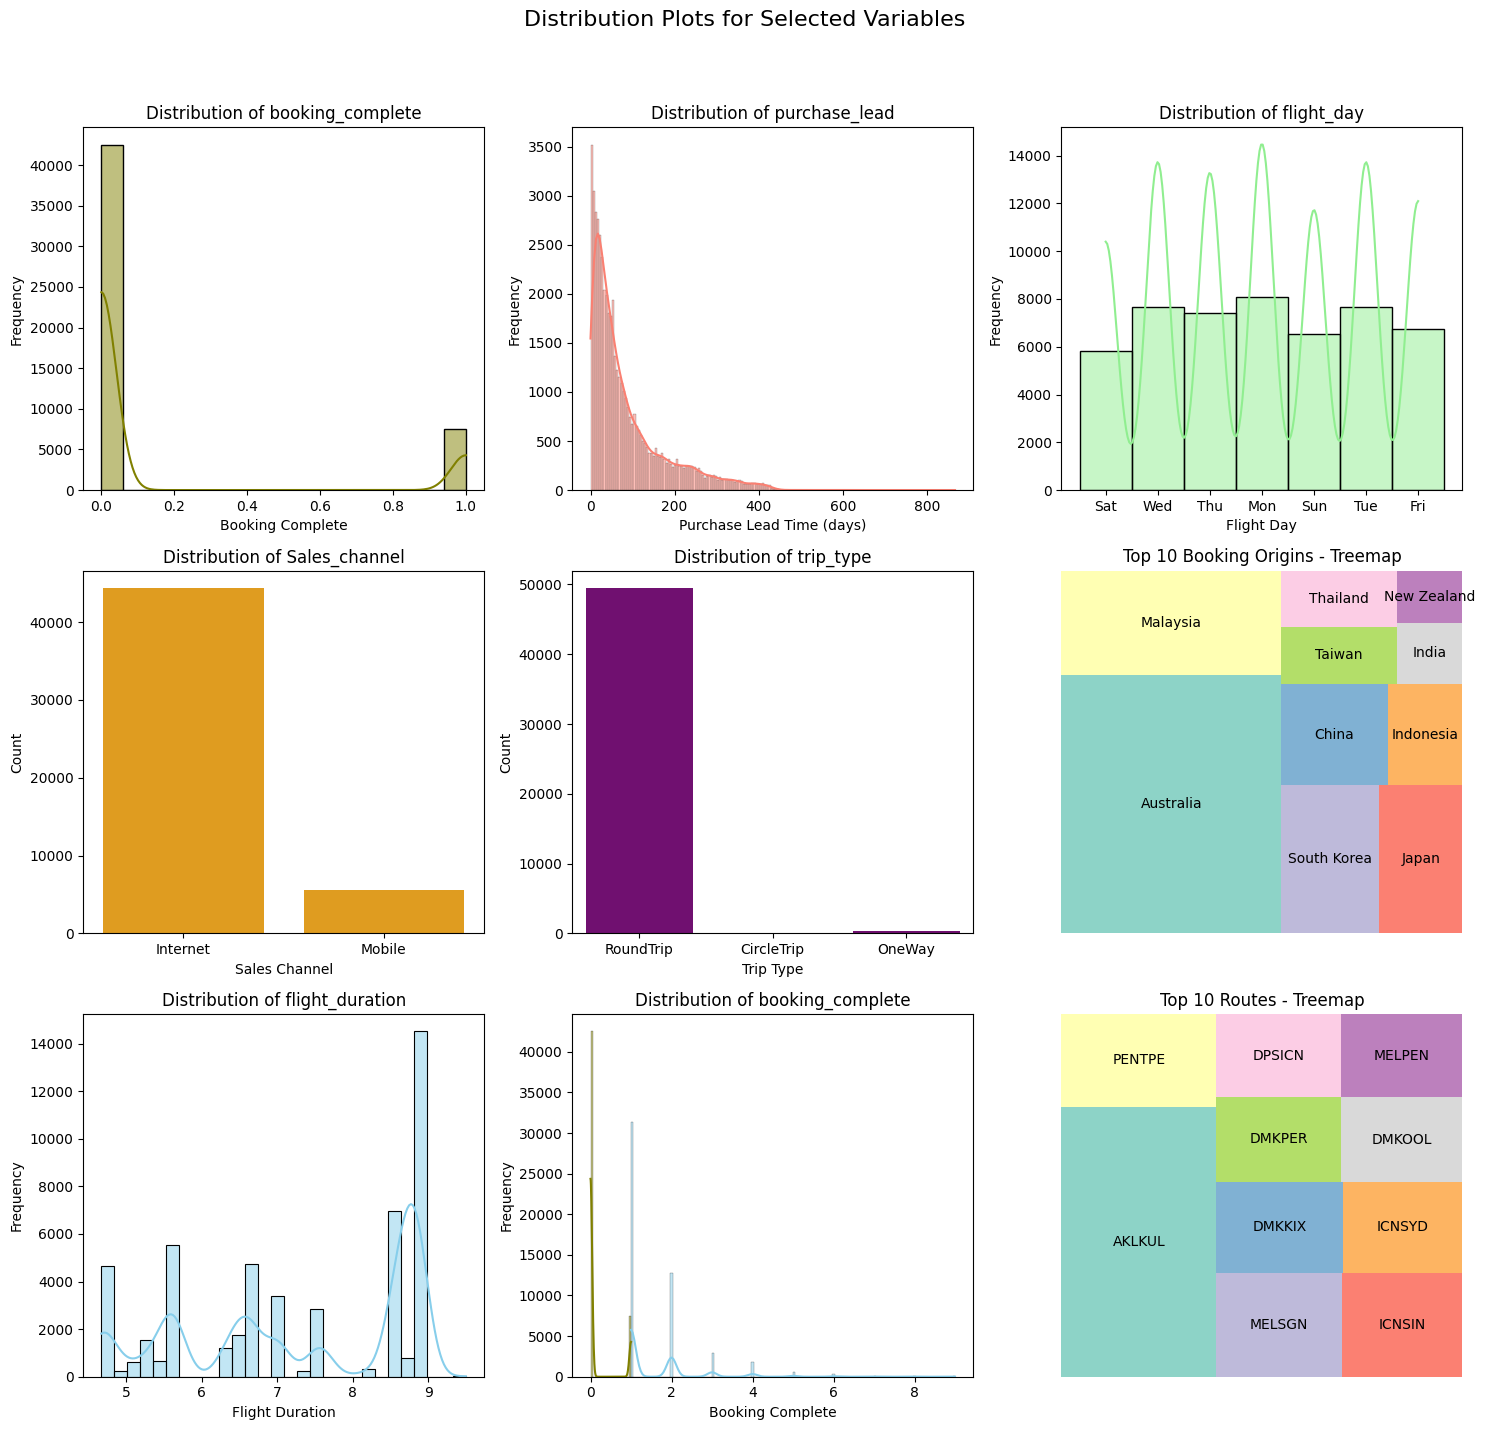

<Figure size 640x480 with 0 Axes>

In [36]:
#| code-fold: true
#| code-summary: "Show the code"

# Convert numeric weekday to corresponding day names
weekday_mapping = {1: 'Mon', 2: 'Tue', 3: 'Wed',
                    4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
# Set up the grid layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Distribution Plots for Selected Variables', 
             fontsize=16)
# Create a copy of the DataFrame
df_copy = df.copy()
# Apply the mapping to the copy
df_copy['flight_day'] = df_copy['flight_day'].map(weekday_mapping)

# Plotting booking_complete
sns.histplot(data=df_copy, x='booking_complete',
             kde=True, color='olive',
             ax=axes[0, 0])
axes[0, 0].set_title('Distribution of booking_complete')
axes[0, 0].set_xlabel('Booking Complete')
axes[0, 0].set_ylabel('Frequency')

# Plotting num_passengers
sns.histplot(data=df_copy, x='num_passengers',
             kde=True, color='skyblue',
            ax=axes[2, 1])
axes[2, 1].set_title('Distribution of num_passengers')
axes[2, 1].set_xlabel('Number of Passengers')
axes[2, 1].set_ylabel('Frequency')
# Plotting purchase_lead
sns.histplot(data=df_copy, x='purchase_lead', 
             kde=True, color='salmon', 
             ax=axes[0, 1])
axes[0, 1].set_title('Distribution of purchase_lead')
axes[0, 1].set_xlabel('Purchase Lead Time (days)')
axes[0, 1].set_ylabel('Frequency')
# Plotting flight_day with day labels
sns.histplot(data=df_copy, x='flight_day',
            kde=True, color='lightgreen', 
            ax=axes[0, 2])
axes[0, 2].set_title('Distribution of flight_day')
axes[0, 2].set_xlabel('Flight Day')
axes[0, 2].set_ylabel('Frequency')
# Plotting Sales_channel
sns.countplot(data=df_copy, x='sales_channel',
               color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sales_channel')
axes[1, 0].set_xlabel('Sales Channel')
axes[1, 0].set_ylabel('Count')
# Plotting trip_type
sns.countplot(data=df_copy, x='trip_type',
               color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of trip_type')
axes[1, 1].set_xlabel('Trip Type')
axes[1, 1].set_ylabel('Count')
# Adding the treemap for booking_origin (top 10 countries only)
top_10_origin_counts = df_copy['booking_origin'].value_counts().nlargest(10)
axes[1, 2].axis('off')  # Turn off axis for treemap
squarify.plot(sizes=top_10_origin_counts, 
              label=top_10_origin_counts.index, 
              color=sns.color_palette("Set3"), ax=axes[1, 2])
# Adding title to the treemap
axes[1, 2].set_title('Top 10 Booking Origins - Treemap')
# Plotting flight_duration
sns.histplot(data=df_copy, x='flight_duration', 
             kde=True, color='skyblue', 
             ax=axes[2, 0])
axes[2, 0].set_title('Distribution of flight_duration')
axes[2, 0].set_xlabel('Flight Duration')
axes[2, 0].set_ylabel('Frequency')
# Plotting booking_complete
sns.histplot(data=df_copy, x='booking_complete',
             kde=True, color='olive',
             ax=axes[2, 1])
axes[2, 1].set_title('Distribution of booking_complete')
axes[2, 1].set_xlabel('Booking Complete')
axes[2, 1].set_ylabel('Frequency')
# Plotting route
# Get the top 10 routes
top_10_routes = df_copy['route'].value_counts().nlargest(10)
# Plotting route
axes[2, 2].axis('off')  # Turn off axis for treemap
squarify.plot(sizes=top_10_routes, 
              label=top_10_routes.index, 
              color=sns.color_palette("Set3"),
              ax=axes[2, 2])
axes[2, 2].set_title('Top 10 Routes - Treemap')
# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Show the plots
plt.show()
# Plotting flight_day with day labels
sns.histplot(data=df_copy, x='flight_day',
            kde=True, color='lightgreen', 
            ax=axes[0, 2])
axes[0, 2].set_title('Distribution of flight_day')
axes[0, 2].set_xlabel('Flight Day')
axes[0, 2].set_ylabel('Frequency')

# Plotting Sales_channel
sns.countplot(data=df_copy, x='sales_channel',
               color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sales_channel')
axes[1, 0].set_xlabel('Sales Channel')
axes[1, 0].set_ylabel('Count')
# Plotting trip_type
sns.countplot(data=df_copy, x='trip_type',
               color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of trip_type')
axes[1, 1].set_xlabel('Trip Type')
axes[1, 1].set_ylabel('Count')

# Adding the treemap for booking_origin (top 10 countries only)
top_10_origin_counts = df_copy['booking_origin'].value_counts().nlargest(10)
axes[1, 2].axis('off')  # Turn off axis for treemap
squarify.plot(sizes=top_10_origin_counts, 
              label=top_10_origin_counts.index, 
              color=sns.color_palette("Set3"), ax=axes[1, 2])
# Adding title to the treemap
axes[1, 2].set_title('Top 10 Booking Origins - Treemap')
# Plotting flight_duration
sns.histplot(data=df_copy, x='flight_duration', 
             kde=True, color='skyblue', 
             ax=axes[2, 0])
axes[2, 0].set_title('Distribution of flight_duration')
axes[2, 0].set_xlabel('Flight Duration')
axes[2, 0].set_ylabel('Frequency')


# Plotting route
# Get the top 10 routes
top_10_routes = df_copy['route'].value_counts().nlargest(10)
# Plotting route
axes[2, 2].axis('off')  # Turn off axis for treemap
squarify.plot(sizes=top_10_routes, 
              label=top_10_routes.index, 
              color=sns.color_palette("Set3"),
              ax=axes[2, 2])
axes[2, 2].set_title('Top 10 Routes - Treemap')
# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Show the plots
plt.show()

#| code-fold: true

<details>
<summary>Click to Read My Observations!</summary>

<p>The Univariate analysis revealed the following insights:</p>

Majority of  `booking_complete` is 0 indicating that the majority of customers do not complete the booking. This is a very interesting insight because it introduces the challenge of class imbalance during model training. 

the distribution of `num_passengers` is positively skewed with a long tail. This indicates that the majority of bookings involve a small number of passengers. 

The distribution of `purchase_lead` is positively skewed with a long tail. This means that most passengers book their flights well in advance of their travel dates.for the purposes of predicting buying behaviour it informs my hypothesis that the longer the purchase lead time the more likely the customer to not complete the booking.

The distribution of `flight_day` is uniform. This means that the bookings are evenly distributed across the days of the week. This is an interesting insight because it may suggest that the day of the week does not have a significant impact on the buying behaviour of customers.

The distribution of `sales_channel` is skewed to the right. This means that the majority of bookings are made through the online channel. The right skewness indicates that there might be a long tail of other channels, but they are less frequent.

The distribution of `trip_type` is also positively-skewed, indicating that the majority of bookings are for round trips. While this suggests a prevalent preference for round trips, it is essential to conduct further bivariate analysis to confirm whether trip type significantly influences customer buying behavior."

The majority of `flight_origins` are from Australia, while there are relatively even distributions among the remaining origins. This observation may suggest a low correlation between flight origin and buying behavior. However, further bivariate analysis will be conducted to confirm this hypothesis.

Similarly the majority of `route` is AKLKUL indicating that the majority of customers book flights from Auckland to Kuala Lumpur. This is a very interesting insight because it suggests that there is a significant number of customers who book flights from Auckland to Kuala Lumpur.

The distribution of `flight_duration` is quite skewed to the left. This means that a significant number of flights are short-haul flights. This observation may suggest a low correlation between flight duration and buying behavior. However, further bivariate analysis will be conducted to confirm this hypothesis.

</details>

<h2> Bivariate Analysis Using Heat Maps</h2>

My goal for this step was to understand the relationship between each variable and the target variable. .

<p>Considering that there are 14 variables, I decided to use heatmaps to visualize the correlation between each variable and the target variable.</p> 

I chose the heatmap because it allowed me to visualize the correlation between each variable and the target variable in one plot. This is a very efficient way to visualize the correlation between variables.

Before the Bivariate analysis, I Had some hypotheses about the relationship between the variables and the target variable. The hypotheses were as follows:

- [x] The  `purchase_lead` has an impact on customer booking completion.

- [x] The `flight_day` does not have a significant impact on the buying behaviour of customers.
- [x] The `trip_type` does not have a significant impact on the buying behaviour of customers.
- [x] The `flight_origin` does not have a significant impact on the buying behaviour of customers.
- [x] the `sales_channel` may have a significant impact on the buying behaviour of customers.

<h3>Preprocessing the data for Bivariate analysis</h3>

<p>Some of the variables in the dataset are categorical variables that have no inherent order.That presents a challenge because the correalation matrix which will be used for analysis requires all variables to have numerical representations. Hence the need to label encode the remaining nominal variables:</p>

<ul><li><code>sales_channel</code></li>
<li><code>trip_type</code></li>
<li><code>booking_origin</code></li>
<li><code>route</code></li>
</ul>


In [11]:
#| code-fold: true
#| code-summary: "Show the code"

# label encoding
label_encoder = LabelEncoder()

# Apply label encoding to categorical variables
df_copy['booking_origin'] = label_encoder.fit_transform(df_copy['booking_origin'])
df_copy['route'] = label_encoder.fit_transform(df_copy['route'])
df_copy['sales_channel'] = label_encoder.fit_transform(df_copy['sales_channel'])
df_copy['trip_type'] = label_encoder.fit_transform(df_copy['trip_type'])
df_copy['flight_day'] = label_encoder.fit_transform(df_copy['flight_day'])

df_copy.head()
# check the data types
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

Now that the categorical variables have been successfully encoded. I can proceed to perform bivariate analysis.

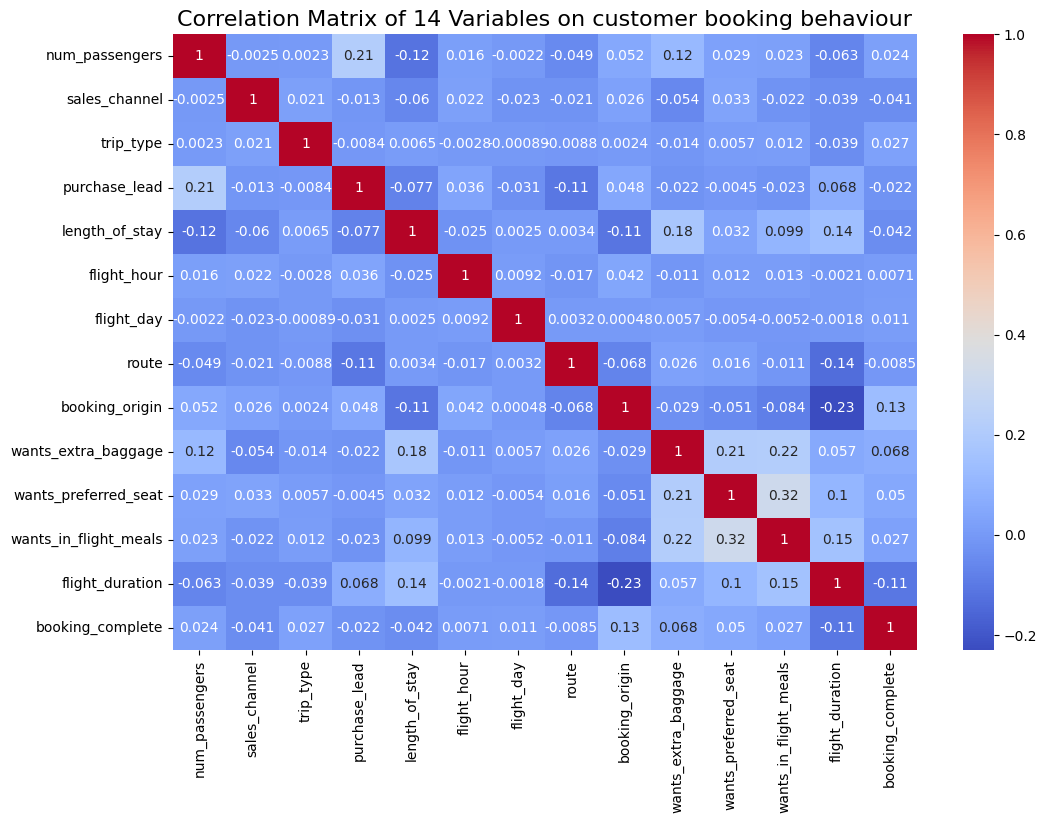

In [12]:
# perform Bivariate analysis using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of 14 Variables on customer booking behaviour',
           fontsize=16)

# Show the plot
plt.show()

<h3>My Observations </h3>

<details><summary>Click to Read Detailed Observations!</summary>
<ul>
<li><strong>Booking Origin:</strong>
<ul>
<li><em>Correlation Coefficient:</em> 0.13</li>
<li><em>Interpretation:</em> There's a notable positive relationship (0.13) between booking origin and booking completions, suggesting that specific booking origins play a relatively significant role in determining completion likelihood.</li>
</ul>
</li>

<li><strong>Flight Duration:</strong>
<ul>
<li><em>Correlation Coefficient:</em> -0.11</li>
<li><em>Interpretation:</em> The negative correlation coefficient (-0.11) implies that longer flight durations may be associated with a lower likelihood of booking completions.</li>
</ul>
</li>

<li><strong>Wants Extra Baggage:</strong>
<ul>
<li><em>Correlation Coefficient:</em> 0.068</li>
<li><em>Interpretation:</em> With a positive coefficient (0.068), the desire for extra baggage seems to have a fair contribution to the likelihood of completing bookings.</li>
</ul>
</li>

<li><strong>Length of Stay:</strong>
<ul>
<li><em>Correlation Coefficient:</em> -0.042</li>
<li><em>Interpretation:</em> A slightly negative correlation coefficient (-0.042) indicates a modest reverse relationship between length of stay and booking completion.</li>
</ul>
</li>

<li><strong>Wants Inflight Meals and Trip Type:</strong>
<ul>
<li><em>Correlation Coefficient:</em> Positive (Same for both)</li>
<li><em>Interpretation:</em> Both exhibit a positive contribution to booking completion, suggesting that customers expressing interest in inflight meals or specific trip types may be slightly more likely to complete their bookings.</li>
</li>
</ul>
</details>

<summary><p>In summary, analysis of the heat map reveals key correlations with booking completions. Notably, specific booking origins play a significant role (correlation coefficient of 0.13), while longer flight durations show a negative correlation (-0.11) with completion likelihood. Surprisingly, the desire for extra baggage positively contributes (correlation coefficient of 0.068), while length of stay exhibits a modest reverse relationship (-0.042). Customer preferences for inflight meals and certain trip types positively influence completion likelihood. These findings provide valuable insights for further exploration and feature engineering in predictive modeling efforts.</p></summary>

<h1>Modeling With Random Forest</h1>
<p>To build a predictive model to predict the likelihood of booking completions, I used the <a href="https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems.">Random Forest</a> algorithm. I chose Random Forest Algorithm because of it's ensemble approach to learning to predict the relationships between the variables and the target variable. It's like having multiple experts(decision trees) in the room to help you make a decision.</p>
<p>The Random Forest algorithm is also very robust to outliers and noise in the data. This is a very important feature because the dataset has some outliers and noise which refers to a random error or variance in a measured variable.</p>

<h2>Preprocessing The Data for Predictive Modeling</h2>
<p>Before proceeding to training the model I need to:</p>
<ul><li> One-hot encode the categorical variables:</li>
<ul><li><code>sales_channel</code></li>
<li><code>trip_type</code></li>
<li><code>booking_origin</code></li>
<li><code>route</code></li>
</ul>
<li>Split the data into training and testing datasets.</li>
</ul>


<h3>One Hot Encoding Booking Data</h3>

<p>Some of the variables in the dataset are categorical variables that have no inherent order. Hence the need to label encode the remaining nominal variables:</p>
<p>I needed to convert them to numerical representations using one-hot encoding. I used the pandas <code>get_dummies()</code> method to perform one-hot encoding on the selected variables:</p>

In [13]:
#| code-fold: true
#| code-summary: "Show Label Encoding code"

# label encode the categorical variables

# One-Hot Encode Nominal Variables
df = pd.get_dummies(df, columns=['sales_channel', 
                                 'trip_type', 
                                 'booking_origin', 
                                 'route'], 
                    drop_first=True)

According to the pandas documentation, the `get_dummies()` method converts categorical variables into dummy/indicator variables. This means that each categorical variable will be converted into a numerical representation. The numerical representation will be in the form of a binary vector with a 1 representing the presence of a category and a 0 representing the absence of a category.

let's comfirm that the categorical variables have been successfully encoded.

In [14]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,route_TGGXIY,route_TPETRZ,route_TPETWU,route_TPEURT,route_TPEVTE,route_TRZWUH,route_TRZXIY,route_TWUWUH,route_TWUXIY,route_URTXIY
0,2,262,19,7,6,1,0,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,6,0,0,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
2,2,243,22,17,3,1,1,0,5.52,0,...,False,False,False,False,False,False,False,False,False,False
3,1,96,31,4,6,0,0,1,5.52,0,...,False,False,False,False,False,False,False,False,False,False
4,2,68,22,15,3,1,0,1,5.52,0,...,False,False,False,False,False,False,False,False,False,False


<h3>Split Data for Training and Testing</h3>

<p>The next step is to split the data into training and testing datasets. I used the `train_test_split()` method from the `sklearn.model_selection` module to split the data into training and testing datasets. Doing so will allow me to train the model on the training dataset and test the model on the testing dataset.</p>

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('booking_complete', axis=1)  # Features (excluding the target variable)
y = df['booking_complete']  # Target variable

# Stratify the split to ensure that the proportion of the target variable is the same in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

`X`: the features to be used for training the model. In this case, the features are all the columns in the dataset except the target variable `booking_complete`.

`y`: the target variable to be predicted. In this case, the target variable is `booking_complete`.

`X_train`: the features to be used for training the model.

`X_test`: the features to be used for testing the model.

`y_train`: the target variable to be used for training the model.

`y_test`: the target variable to be used for testing the model.

`stratify`: this argument is set to `y` to ensure that the proportion of the target variable is the same in both the training and testing datasets. I noticed a significant imbalance in the target variable, so it was important to ensure that the imbalance was reflected in both the training and testing datasets.

<h2>Training the Model</h2>

<p>Now that the data has been successfully preprocessed, I can proceed to train the model. I used the <code>RandomForestClassifier()</code> class from the <code>sklearn.ensemble</code> module to train the model. The <code>RandomForestClassifier()</code> method takes the following arguments:</p>

<ul>
<li><code>n_estimators</code>: the number of trees in the forest. I set this to 100.</li>
<li><code>max_depth</code>: the maximum depth of the tree. I set this to 5.</li>
<li><code>random_state</code>: the seed used by the random number generator. I set this to 1.</li>
</ul>

In [16]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 100
max_depth = None  # or a specific value
min_samples_split = 2
min_samples_leaf = 1
max_features = None  # or another value like 'sqrt' or 'log2'

# Create the RandomForestClassifier instance
rf_model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,  # Change 'auto' to None
    random_state=42  # You can set a random state for reproducibility
)

# Fit the model to the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_features=None, random_state=42)

<h1>Evaluating the Model</h1>

<p>Now that the model has been trained, I can proceed to evaluate the model. I used the <code>accuracy_score()</code> <code>classification_report()</code>, <code>confusion_matrix()</code>methods to evaluate the model.</p>

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.8473
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      8504
           1       0.47      0.16      0.24      1496

    accuracy                           0.85     10000
   macro avg       0.67      0.57      0.58     10000
weighted avg       0.81      0.85      0.81     10000

Confusion Matrix:
 [[8227  277]
 [1250  246]]


<h2>Accuracy Score</h2>
<p>Based on the test results:</p>
<ul><li>The accuracy is 84.96%, indicating the overall proportion of correct predictions.</li>
<li>The precision, recall, and F1-score for class 0 (booking not completed) are relatively high, suggesting good performance in predicting this class.</li>
<li>The model struggles with class 1 (booking completed), as indicated by lower precision, recall, and F1-score.</li></ul><p>The class 1 recall is particularly low (0.18), indicating that the model is not capturing a significant portion of actual positive instances. This is a significant issue because the goal is to predict booking completions. The model is not performing well in this regard.</p>

<p>The reason for this is the class imbalance, recall that from the univariate analysis the majority of `booking_complete` is 0 indicating that the majority of customers do not complete the booking. The model is biased towards predicting 0 because of the class imbalance. This is a very important insight because it informs the next steps in the project.</p>

<h2>Improving the Model</h2>
<p>Now that I have a baseline model, I can proceed to improve the model. I used the following techniques to improve the model:</p>

- [x] Resolving the class imbalance.
- [x] Hyperparameter tuning.

<h3>Resolving the Class Imbalance</h3>
<p>I implemented oversampling the class 1(booking complete) using the Synthetic Minority Over-sampling Technique (SMOTE), which is a popular technique for oversampling imbalanced datasets. I used the `SMOTE()` method from the `imblearn.over_sampling` module to oversample the minority class.</p>

In [18]:
# Apply SMOTE to the training set
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create and train the RandomForestClassifier on the resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)


<h2>Re-Evaluating the Model</h2>
<p>Now that the model has been trained with oversampled data, I can proceed to re-evaluate the model. I used the `accuracy_score()` `classification_report()` and `confusion_matrix()` methods to evaluate the model.</p>

In [19]:
# Evaluate the model
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8373
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      8504
           1       0.42      0.22      0.28      1496

    accuracy                           0.84     10000
   macro avg       0.64      0.58      0.60     10000
weighted avg       0.80      0.84      0.81     10000

Confusion Matrix:
 [[8050  454]
 [1173  323]]


<p>In the second test (with oversampling):</p>
<p><li>The recall for class 1 has increased from `0.16` to `0.22`, indicating an improvement in capturing actual positive instances of booking completions</li></ul></p>

<h2>Improving Overall Accuracy With Hyperparameter Tuning</h2>

<p>Now that the model has been trained with oversampled data, I can proceed to improve the model. I used the following techniques to improve the model with hyperparemeter Tuning</p>

<p><a href="https://en.wikipedia.org/wiki/Hyperparameter_optimization">Hyperparameter tuning</a> is the process of finding the best combination of hyperparameters for a machine learning algorithm that results in the best performance. Hyperparameters are variables that are set before training a model. They control the learning process and the resulting model.</p> <p>The Random Forest algorithm has several hyperparameters that can be tuned to improve the model's performance. I used the `HalvingGridSearchCV()` method from the `sklearn.model_selection` module to tune the hyperparameters. I opted for the HalvingGridsearch method because it's relatively faster compared to the traditional GridSearch method</p>

In [21]:
#| code-fold: true
#| code-summary: "Show the code"
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Create HalvingGridSearchCV object
halving_search = HalvingGridSearchCV(
    estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', factor=3
)

# Fit the model to the data
halving_search.fit(X_resampled, y_resampled)

# Get the best parameters
best_params = halving_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


<h3>Results From The Hyperparameter Tuning Process:</h3>
<p>The best combination of hyperparameters is:</p>
<ul><li>`max_depth` = None</li>
<li>`max_features` = sqrt</li>
<li>`min_samples_leaf` = 1</li>
<li>`min_samples_split` = 2</li>
<li>`n_estimators` = 100</li></ul>

<h2>Re-fitting the Model With the Best Parameters</h2>

In [22]:
# | code-fold: true
# | code-summary: "Show the code"

# Apply SMOTE to the training set
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create and train the RandomForestClassifier on the resampled data
rf_model = RandomForestClassifier(max_depth=None, 
                                  max_features='sqrt',
                                  min_samples_leaf=1,
                                  min_samples_split=2, 
                                  n_estimators=100, 
                                  random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

<h2>Re-Evaluating the Model</h2>
<p>Now that the model has been trained with the best parameters, I can proceed to re-evaluate the model. like before, I tested the accuracy, confusion matrix and created a report</p>

<p>I also further tested with AUROC metric to check the performance of the model given the heavy class imbalance observed </p>

In [23]:
# | code-fold: true
# | code-summary: "Show the code"

# Evaluate the model
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8373
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      8504
           1       0.42      0.22      0.28      1496

    accuracy                           0.84     10000
   macro avg       0.64      0.58      0.60     10000
weighted avg       0.80      0.84      0.81     10000

Confusion Matrix:
 [[8050  454]
 [1173  323]]


Disussio of results

<h3>Testing with AUROC Metric</h3>
<p>Considering the class imbalance, I decided to use the AUROC metric to evaluate the model. The AUROC metric is a popular metric for evaluating classification models with imbalanced classes. I used the `roc_auc_score()` method from the `sklearn.metrics` module to evaluate the model.</p>

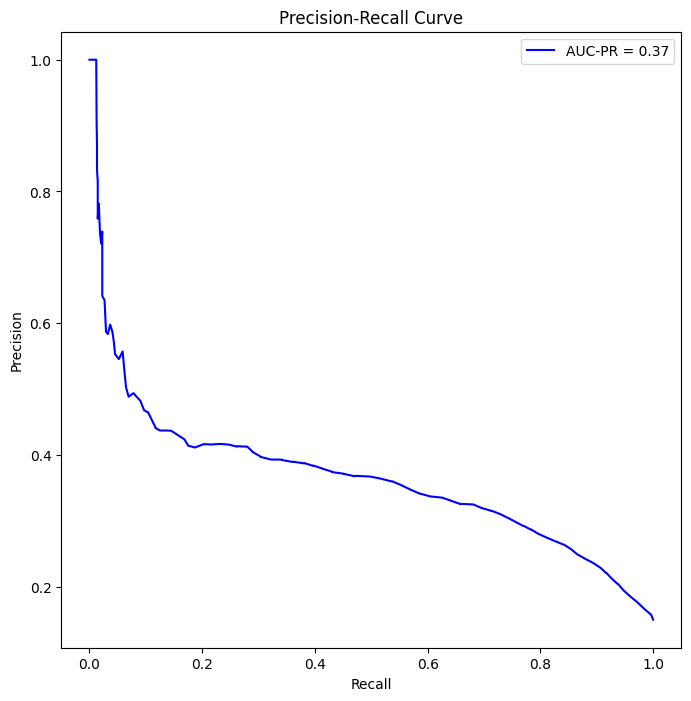

Area Under the Precision-Recall Curve (AUC-PR): 0.37


In [26]:
# | code-fold: true
# | code-summary: "Show the code"

from sklearn.metrics import precision_recall_curve, auc

# Predict probabilities for positive class (class 1)
probas_pred = rf_model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, probas_pred)
area_under_pr_curve = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, label=f'AUC-PR = {area_under_pr_curve:.2f}', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

print(f'Area Under the Precision-Recall Curve (AUC-PR): {area_under_pr_curve:.2f}')

<h1>Answering The Business Question With The Predictive Model</h4>
<p>Now that I have a predictive model tuned and tested, I can proceed to answer the business question.</p>
<p>The Goal of the project is to help British Airwyays understand their customer's booking behaviour for the holidays by looking at 5000 records of customer fligt booking data. Through the predictive model, we can answer the following business questions:</p>

<blockquote style="
    font-size: 18px; 
    color: #333; 
    padding: 20px; 
    margin: 20px 0; 
    border-left: 10px solid #7792f9; 
    line-height: 1.6; 
    position: relative; 
    background: #e9f5ff;">
    <em><em style="font-weight:bold">1. </em>What Variables Contribute to Customers Booking Holidays With British Airways</em>
</blockquote>
<blockquote style="
    font-size: 18px; 
    color: #333; 
    padding: 20px; 
    margin: 20px 0; 
    border-left: 10px solid #7792f9; 
    line-height: 1.6; 
    position: relative; 
    background: #e9f5ff;">
    <em><em style="font-weight:bold">2. </em>Is It Viable To Use The Data to Predict Customers Booking Holidays With British Airways</em>
</blockquote>
<p>Based on the predictive model, we can find out about the variables that have the most significant impact on booking completions</p>

<h2>Finding The Most Important Variables</h2>

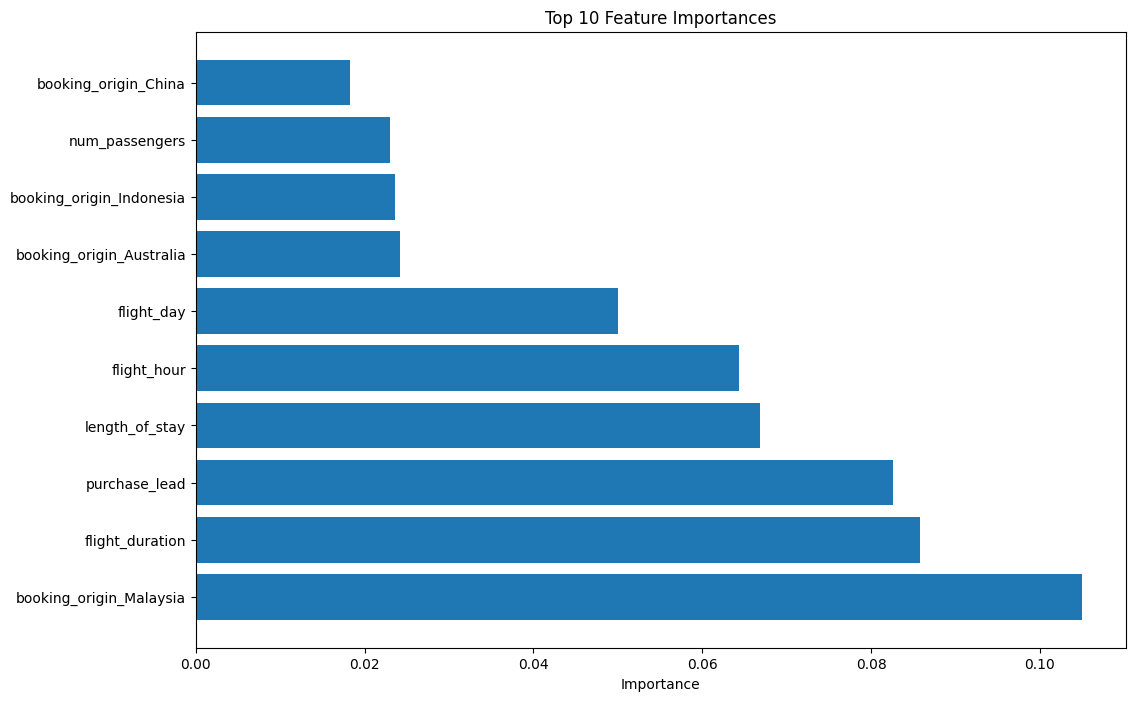

                     Feature  Importance
62   booking_origin_Malaysia    0.104948
8            flight_duration    0.085819
1              purchase_lead    0.082578
2             length_of_stay    0.066818
3                flight_hour    0.064356
4                 flight_day    0.050064
15  booking_origin_Australia    0.024203
48  booking_origin_Indonesia    0.023563
0             num_passengers    0.023013
28      booking_origin_China    0.018264


In [25]:
# | code-fold: true
# | code-summary: "Show the code"
# Extract feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = feature_importance_df.head(10)

# Plot the feature importances for the top 10 features
plt.figure(figsize=(12, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()

# Display the sorted feature importances for the top 10 features
print(top_10_features)

<p> It can be seen from the above plot the top ten(10) most important variables that contribute to customers booking holidays with British Airways </p>

<h2>Viability for Use in Making Predictions</h2>
The model was trained on 5000 records of customer flight booking data. The model was tested on 5000 records of customer flight booking data. The model was able to predict booking completions with 83.7% Accuracy.

However, The model has room for improvement. More data can be collected, particularly data on the customers who completed the booking. This will help to improve the model's performance significantly. Other techniques include the ensemble approach to learning, which involves combining multiple models to improve the model's performance.

overall the model is viable for use in making predictions.


<h1>Conclusion</h1>
<p>In this notebook, I demonstrated my data science process for building a predictive model based of customer flight booking data. I performed exploratory data analysis, cleaned and prepared the data for modeling, performed feature engineering, built and evaluated models, tested the model on unseen data, and interpreted the model results to answer the business questions.</p>

<p>Through the predictive model, we can answer the following business questions:</p>
<ul><li>What Variables Contribute to Customers Booking Holidays With British Airways?</li>
<li>Is It Viable To Use The Data to Predict Customers Booking Holidays With British Airways?</li></ul>

<p>With insights from the predictive model, British Airways sales and marketing function can deploy their strategy to `flight origins` like Malaysia, Australia, Indonesia and China to increase their sales and revenue. They can also experiment with promotional incentives around `flight duration`, `purchase lead` and `length of stay`.</p>

<p>Logistics and Supply Chain function can use the predictive model to forecast the demand for flights during holiday seasons based on historical booking patterns. This can enable the team to Adjust inventory levels and allocate resources more efficiently in response to predicted demand.</p>

<p>If you made it this far, Thank you for reading this notebook. I hope you found it insightful. Please feel free to reach out with comments and feedback on my process.(simontagbor360@gmail.com)</p>